In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [2]:
df = pd.read_csv("covid_vaccine_statewise.csv")
prasad = df[['State', 'Total Doses Administered', 'Male (Doses Administered)', 'Female (Doses Administered)']]
prasad = prasad.dropna(subset=['Total Doses Administered','Male (Doses Administered)', 'Female (Doses Administered)'], axis=0, how='any')
state = prasad['State'].unique()
state = state.tolist()
state.pop(0)
prasad_dic_male ={}
prasad_dic_female ={}
bw = 0.5
bw1 = np.arange(len(state))
bw2 = [x + bw for x in bw1]
for i in state:
    prasad_dic_male[i] = max(prasad[prasad['State']==i]['Male (Doses Administered)'])
    prasad_dic_female[i] = max(prasad[prasad['State']==i]['Female (Doses Administered)'])
column1 = list(prasad_dic_male.keys())
column2 = list(prasad_dic_male.values())
column3 = list(prasad_dic_female.values())
data = {'State':column1, 'male':column2, 'female':column3}
df1 = pd.DataFrame(data)

In [3]:
df1

,State,male,female
0,Andaman and Nicobar Islands,165554.0,145049.0
1,Andhra Pradesh,10852932.0,12986129.0
2,Arunachal Pradesh,486874.0,391993.0
3,Assam,6739027.0,5962985.0
4,Bihar,14926420.0,12902990.0
5,Chandigarh,524263.0,399424.0
6,Chhattisgarh,5916437.0,5851349.0
7,Dadra and Nagar Haveli and Daman and Diu,444656.0,220429.0
8,Delhi,6228216.0,4605508.0
9,Goa,748770.0,648014.0


 Tripura


C:\Users\PV\AppData\Local\Temp\ipykernel_8028\814485474.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  male = int(df1[df1['State']==state]['male'])
C:\Users\PV\AppData\Local\Temp\ipykernel_8028\814485474.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  female = int(df1[df1['State']==state]['female'])


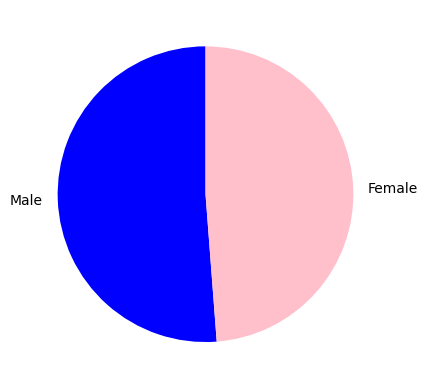

In [4]:
def plot_male_female(state):
    male = int(df1[df1['State']==state]['male'])
    female = int(df1[df1['State']==state]['female'])
    plot = (male,female)
    plt.pie(x=plot, startangle=90, colors=['b', 'pink'], labels=['Male', 'Female'])
    plt.show()

i = input()
plot_male_female(i)

In [5]:
shantanu = df
shantanu = shantanu[['Updated On', 'State', 'Total Doses Administered', 'First Dose Administered', 'Second Dose Administered']]
shantanu = shantanu.dropna(subset=['Total Doses Administered','First Dose Administered', 'Second Dose Administered'], axis=0, how='all')

In [6]:
shantanu

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,India,48276.0,48276.0,0.0
1,17/01/2021,India,58604.0,58604.0,0.0
2,18/01/2021,India,99449.0,99449.0,0.0
3,19/01/2021,India,195525.0,195525.0,0.0
4,20/01/2021,India,251280.0,251280.0,0.0
...,...,...,...,...,...
7834,05/08/2021,West Bengal,31371174.0,22401043.0,8970131.0
7835,06/08/2021,West Bengal,31774086.0,22745949.0,9028137.0
7836,07/08/2021,West Bengal,32029325.0,22959053.0,9070272.0
7837,08/08/2021,West Bengal,32098768.0,23017864.0,9080904.0


In [16]:
shantanu['Updated On'] = pd.to_datetime(shantanu['Updated On'])
shantanu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7621 entries, 0 to 7838
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Updated On                7621 non-null   datetime64[ns]
 1   State                     7621 non-null   object        
 2   Total Doses Administered  7621 non-null   float64       
 3   First Dose Administered   7621 non-null   float64       
 4   Second Dose Administered  7621 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 357.2+ KB


In [8]:
shantanu

,Updated On,State,Total Doses Administered,First Dose Administered,Second Dose Administered
0,2021-01-16,India,48276.0,48276.0,0.0
1,2021-01-17,India,58604.0,58604.0,0.0
2,2021-01-18,India,99449.0,99449.0,0.0
3,2021-01-19,India,195525.0,195525.0,0.0
4,2021-01-20,India,251280.0,251280.0,0.0
...,...,...,...,...,...
7834,2021-08-05,West Bengal,31371174.0,22401043.0,8970131.0
7835,2021-08-06,West Bengal,31774086.0,22745949.0,9028137.0
7836,2021-08-07,West Bengal,32029325.0,22959053.0,9070272.0
7837,2021-08-08,West Bengal,32098768.0,23017864.0,9080904.0


In [9]:
print(max(shantanu['Updated On']))

2021-08-09 00:00:00


In [10]:
shantanu.isnull().sum()

Updated On                  0
State                       0
Total Doses Administered    0
First Dose Administered     0
Second Dose Administered    0
dtype: int64

In [11]:
states = list(df['State'].unique())
print(len(states))

37


In [12]:
dates = list(df['Updated On'])
print(len(dates))

7845


In [13]:
dates = list(df[df['State']=='India']['Updated On'].unique())
print(len(dates))

212


 Tripura


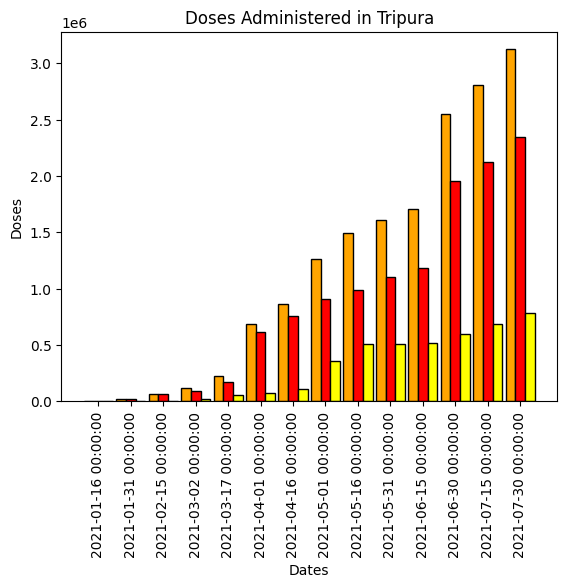

In [14]:
def first_second_dose(state):
    df = shantanu[shantanu['State']==state]
    dates = list(df['Updated On'])
    dates = dates[::15]
    total = list(df['Total Doses Administered'])
    total = total[::15]
    first = list(df['First Dose Administered'])
    first = first[::15]
    second = list(df['Second Dose Administered'])
    second = second[::15]
    bw = 0.30
    bw1 = np.arange(len(dates))
    bw2 = [x + bw for x in bw1]
    bw3 = [x + bw for x in bw2]
    plt.bar(bw1, total, width=bw, label='Total', color='orange', edgecolor='black')
    plt.bar(bw2, first, width=bw, label='First Dose', color='red', edgecolor='black')
    plt.bar(bw3, second, width=bw, label='Second Dose', color='yellow', edgecolor='black')
    plt.xlabel('Dates') 
    plt.ylabel('Doses') 
    plt.xticks([r + bw for r in range(len(dates))], dates)
    plt.xticks(rotation=90)
    plt.title('Doses Administered in '+state)
    plt.show()

w = input()
first_second_dose(w)

In [17]:
dataFrame = pd.read_csv('StatewiseTestingDetails.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [28]:
pritish1 = df[['Updated On', 'State', 'Total Doses Administered']]
pritish1 = pritish1.dropna()
pritish1

,Updated On,State,Total Doses Administered
0,16/01/2021,India,48276.0
1,17/01/2021,India,58604.0
2,18/01/2021,India,99449.0
3,19/01/2021,India,195525.0
4,20/01/2021,India,251280.0
...,...,...,...
7834,05/08/2021,West Bengal,31371174.0
7835,06/08/2021,West Bengal,31774086.0
7836,07/08/2021,West Bengal,32029325.0
7837,08/08/2021,West Bengal,32098768.0


In [20]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.3+ KB


In [75]:
pritish2 = dataFrame
pritish2 = pritish2.dropna(subset=['Negative', 'Positive'], axis=0, how='all')
pritish2.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        2104
Positive        3411
dtype: int64

In [82]:
pritish2 = pritish2.replace(' ', np.nan)

In [83]:
pritish2['Positive'] = pd.to_numeric(pritish2['Positive'])

In [84]:
pritish2['Negative'] = pd.to_numeric(pritish2['Negative'])
pritish2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9073 entries, 0 to 15982
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9073 non-null   object 
 1   State         9073 non-null   object 
 2   TotalSamples  9073 non-null   float64
 3   Negative      6968 non-null   float64
 4   Positive      5662 non-null   float64
dtypes: float64(3), object(2)
memory usage: 425.3+ KB


In [90]:
pritish2.iloc[6515]['Negative']

nan

In [88]:
pritish2

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
15976,2020-08-16,West Bengal,1314772.0,NaN,116498.0
15977,2020-08-17,West Bengal,1347091.0,NaN,119578.0
15978,2020-08-18,West Bengal,1382198.0,NaN,122753.0
15981,2020-08-21,West Bengal,1487844.0,NaN,132364.0


In [93]:
for i in range(9073):
    if((str(pritish2.iloc[i,4])=='nan')):
        pritish2.iloc[i,4] = pritish2.iloc[i,2] - pritish2.iloc[i,3]
    if((str(pritish2.iloc[i,3])=='nan')):
        pritish2.iloc[i,3] = pritish2.iloc[i,2] - pritish2.iloc[i,4]

pritish2.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [100]:
len(pritish1['Updated On'].unique())
len(pritish2['Date'].unique())
dates = []
for i in range(len(pritish2['Date'].unique())):
    for j in range(len(pritish1['Updated On'].unique())):
        if(pritish2.iloc[i,0] == pritish1.iloc[j,0]):
            dates.append(pritish2.iloc[i,0])

print(dates)

[]


In [95]:
if(list(pritish1['Updated On'].unique())==list(pritish2['Date'].unique())):
    print("Haa")

In [106]:
def model(state):
    df1 = pritish1[pritish1['State']==state]
    df2 = pritish2[pritish2['State']==state]

    if(len(df1['Updated On'].unique()) > len(df2['Date'].unique())):
        no_of_dates = len(df2['Date'].unique())
    else:
        no_of_dates = len(df1['Updated On'].unique())

    # column1 = []
    column2 = []
    column3 = []
    column4 = []
    for i in range(no_of_dates):
        # column1.append(df1.iloc[i,2])
        column2.append(df2.iloc[i,3])
        column3.append(df2.iloc[i,4])
        column4.append(df2.iloc[i,2])

    final = {'Positive' : column3, 'Negative' : column2, 'Total Test' : column4} # 'Total Doses Administered' : column1, 
    finale = pd.DataFrame(data=final)

    x = finale[['Positive', 'Total Test']] # 'Total Doses Administered', 
    y = finale['Negative']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)
    std = StandardScaler()
    x_train = std.fit_transform(x_train)
    x_test = std.fit_transform(x_test)
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_predict = nb.predict(x_test)
    acc = accuracy_score(y_test, y_predict)
    print(acc)

In [107]:
q = input()
model(q)

 Tripura


0.0


In [109]:
df1 = pritish1[pritish1['State']=='Tripura']
df2 = pritish2[pritish2['State']=='Tripura']

if(len(df1['Updated On'].unique()) > len(df2['Date'].unique())):
    no_of_dates = len(df2['Date'].unique())
else:
    no_of_dates = len(df1['Updated On'].unique())

    # column1 = []
column2 = []
column3 = []
column4 = []
for i in range(no_of_dates):
    # column1.append(df1.iloc[i,2])
    column2.append(df2.iloc[i,3])
    column3.append(df2.iloc[i,4])
    column4.append(df2.iloc[i,2])

In [115]:
final = {'Positive' : column3, 'Negative' : column2, 'Total Test' : column4} # 'Total Doses Administered' : column1, 
finale = pd.DataFrame(data=final)
finale

,Positive,Negative,Total Test
0,2.0,335.0,337.0
1,2.0,736.0,738.0
2,2.0,760.0,762.0
3,2.0,2602.0,2604.0
4,2.0,3123.0,3215.0
...,...,...,...
201,31916.0,460332.0,492248.0
202,31942.0,461953.0,493895.0
203,31959.0,462668.0,494627.0
204,32036.0,465009.0,497045.0


In [125]:
x = finale[['Positive', 'Total Test']] # 'Total Doses Administered', 
y = finale['Negative']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=5)
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [126]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [127]:
y_predict = nb.predict(x_test)

In [128]:
acc = accuracy_score(y_test, y_predict)
print(acc)

0.0
